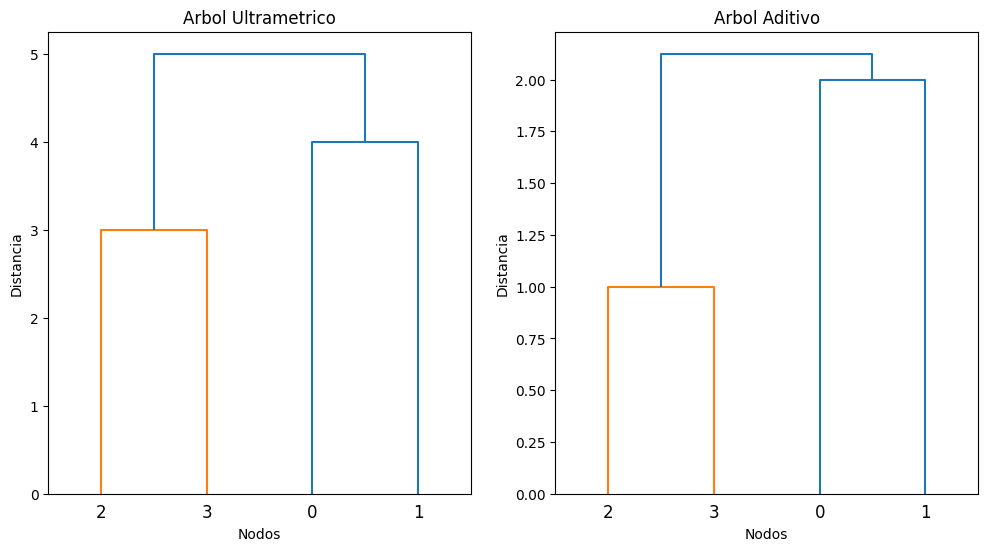

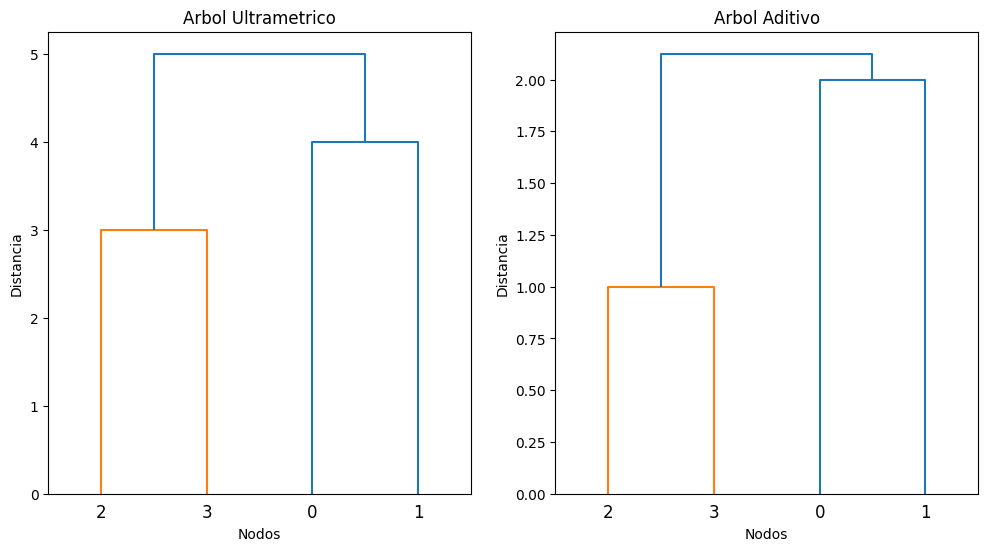

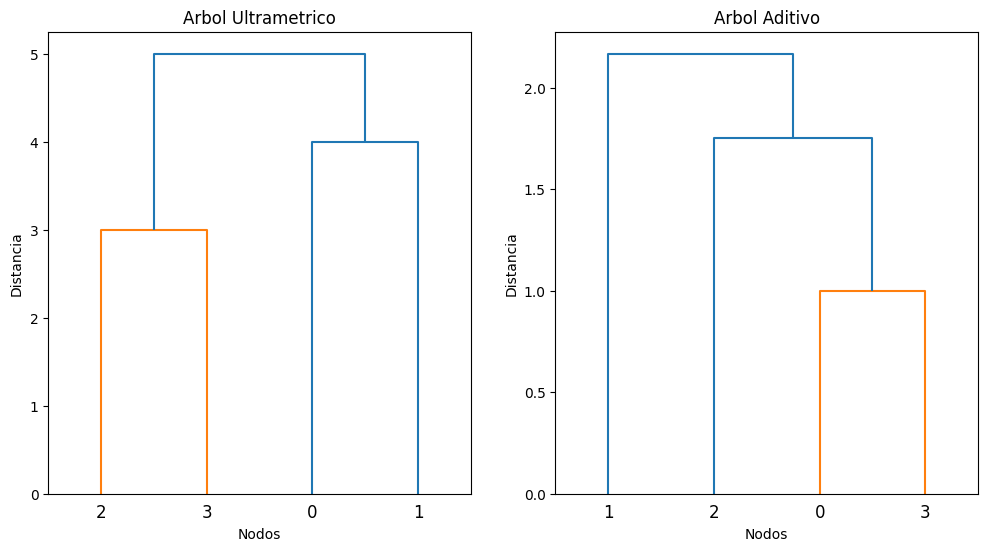

In [2]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# funcion principal
def GenerarArboles():
    try:
        # Eliminar espacios
        entrada = matriz.get("1.0", tk.END).strip()
        filas = entrada.splitlines()

        # Rellena la matriz con ceros
        matrizRellena = []
        for i, line in enumerate(filas):
            fila = [0.0] * i + list(map(float, line.split()))
            matrizRellena.append(fila + [0.0] * (len(filas) - len(fila)))
        matrizRellena = np.array(matrizRellena)

        # matriz cuadrada
        if matrizRellena.shape[0] != matrizRellena.shape[1]:
            raise ValueError("La matriz debe ser cuadrada.")
        UltrametricTree = CalcularUltrametricTree(matrizRellena)
        AdditiveTree = CalcularAdditiveTree(matrizRellena)

        # Graficar arboles
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        Dendograma(UltrametricTree, "Arbol Ultrametrico", axs[0])
        Dendograma(AdditiveTree, "Arbol Aditivo", axs[1])
        plt.tight_layout()

        # Mostrar el gráfico en la ventana de Tkinter
        global canvas
        if canvas:
            canvas.get_tk_widget().pack_forget()
            canvas = None
        canvas = FigureCanvasTkAgg(fig, master=root)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    except Exception as e:
        messagebox.showerror("Error", f"Ocurrió un error: {str(e)}")

# calcular ultrametric tree
def CalcularUltrametricTree(matriz):
    TamanoMatriz = len(matriz)
    ultrametric = np.zeros_like(matriz)
    for i in range(TamanoMatriz):
        for j in range(i + 1, TamanoMatriz):
            ultrametric[i, j] = ultrametric[j, i] = np.max(matriz[i:j+1, i:j+1])
    return ultrametric

# calcular additive tree
def CalcularAdditiveTree(matriz):
    TamanoMatriz = len(matriz)
    additive = np.zeros_like(matriz)
    for i in range(TamanoMatriz):
        for j in range(i + 1, TamanoMatriz):
            additive[i, j] = additive[j, i] = (matriz[i, j] + matriz[j, i]) / 2
    return additive

# Generar dendrograma
def Dendograma(matriz, titulo, ax):
    # lista con distancias y dendrograma
    MatrizCondensada = matriz[np.triu_indices(len(matriz), k=1)]
    nodo = linkage(MatrizCondensada, method='average')
    dendrogram(nodo, ax=ax)

    ax.set_title(titulo)
    ax.set_xlabel("Nodos")
    ax.set_ylabel("Distancia")

# Interfaz grafica con tk
root = tk.Tk()
root.title("Ultrametric Tree y Additive Tree")

# Ingresar matriz de distancias sin ceros y separados por espacios, ej:
# 1 4 5 3
# 4 5 4
# 3 2
# 1
instrucciones = tk.Label(root, text="Ingrese la matriz de distancias (Columnas separadas por espacios y filas por saltos de linea):")
instrucciones.pack(pady=10)
matriz = tk.Text(root, height=10, width=50)
matriz.pack(pady=10)
BotonGenerarArboles = tk.Button(root, text="Generar Arboles", command=GenerarArboles)
BotonGenerarArboles.pack(pady=10)
canvas = None
root.mainloop()

